In [ ]:
3.05175789283781

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
import scipy.io as sio
import scipy.io.wavfile
import librosa, librosa.display 

In [60]:
#오디오 데이터 불러오기 scipy
sample_rate, signal = sio.wavfile.read('test.wav')

In [75]:
#오디오 데이터 불러오기 liborsa
sig, sr = librosa.load('test.wav')

In [67]:
#전체 데이터 
sig

array([-0.16915894, -0.021698  ,  0.01956177, ...,  0.07662964,
        0.03872681, -0.02105713], dtype=float32)

In [72]:
type(signal[0])

numpy.int16

In [63]:
#초당 sampling 갯수
sr

22050

In [73]:
#총 시간
times = np.arange(len(signal))/float(sample_rate)
times[-1]

30.00013605442177

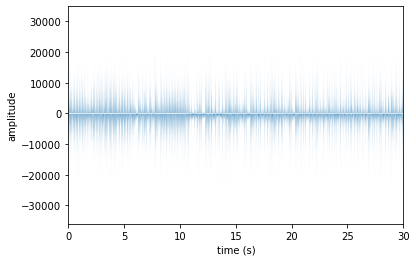

In [74]:
plt.fill_between(times, signal)
plt.xlim(times[0], times[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()

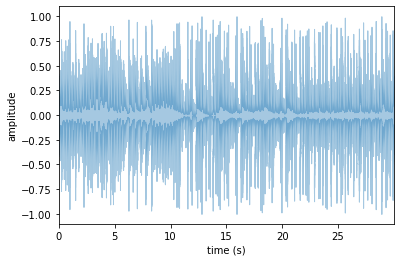

In [81]:
librosa.display.waveplot(sig,sr,alpha=0.4)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.show()

In [82]:
#푸리에 변환
Fourier = np.fft.fft(data)
magnitude = np.abs(Fourier)
freq = np.linspace(0,sample_rate,len(magnitude))

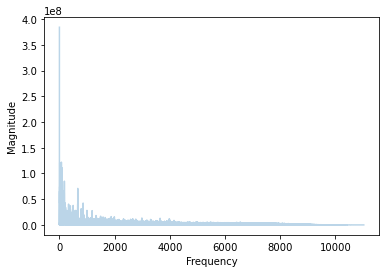

In [84]:
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = freq[:int(len(magnitude)/2)]

plt.plot(left_f, left_spectrum,alpha=0.3)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [96]:
#Spectrogram
frame_size = 0.025
frame_stride = 0.01
frame_sample = 2205

frame_step = int(round(frame_stride * sample_rate))
frame_length =int(round(sample_rate * frame_size))

signal_length = len(np.append(signal[0], signal[1:] - 0.97 * signal[:-1]))
num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))

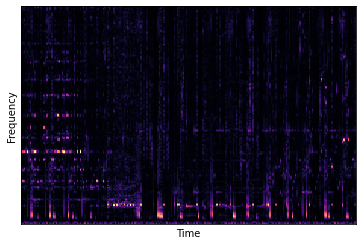

In [115]:
# duration 계산
length_duration = float(num_frames)/sr
frame_sample_length_duration= float(frame_sample)/sr

stft = librosa.stft(sig,frame_sample,num_frames)
magnitude = np.abs(stft)

librosa.display.specshow(magnitude,sr=sr,hop_length= num_frames)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.ylim(0, 200)
plt.show()

In [117]:
MFCC= librosa.feature.mfcc(sig,sr,n_fft=frame_sample,hop_length= num_frames,n_mfcc=13)

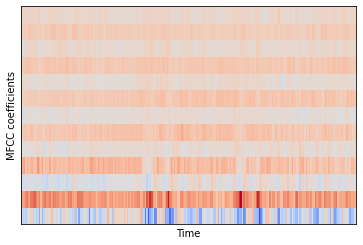

In [120]:
librosa.display.specshow(MFCC, sr=sr, hop_length=num_frames)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.show()